In [208]:
import colorcorrect.algorithm as cca
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
import numpy as np
import viola
import scipy
import scipy.ndimage
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
X = cv2.imread('data/retinex_without_11.jpg')
X = cv2.resize(X, (320, 240))

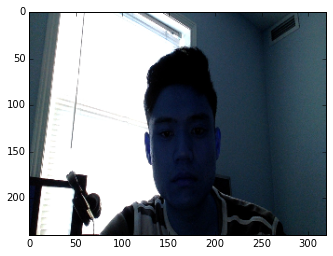

In [210]:
plt.imshow(X)

Face model found!
Eye model found!
Profile model found!
Nose model found!
(240, 320)
()


{'faceX': -1,
 'faceY': -1,
 'isFrontFace': 0,
 'isRotatedFace': 0,
 'noseX': -1,
 'noseY': -1,
 'time': 1457391535.578748}

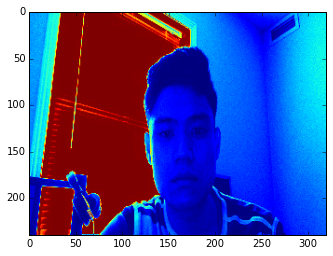

In [211]:
# reread it
y_base = cca.stretch(X)
cv2.imwrite('test-base.jpg',y_base)
y_base = cv2.imread('test-base.jpg')
y_base_gray = cv2.cvtColor(y_base, cv2.COLOR_BGR2GRAY)
plt.imshow(y_base_gray)
viola.apply_viola(y_base, y_base_gray)

# Estimate Luminance

In [212]:
# import scipy.ndimage
# X = X*1.1  + (X - scipy.ndimage.filters.gaussian_filter(X, 0.5))
# plt.imshow(X)

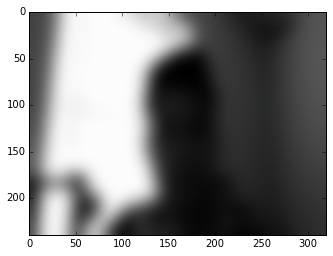

In [213]:

luminance = scipy.ndimage.filters.gaussian_filter(X, 9)
log_luminance = np.log1p(luminance)
plt.imshow(luminance)

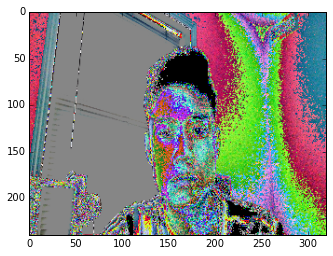

In [214]:
plt.imshow(np.log1p(X))

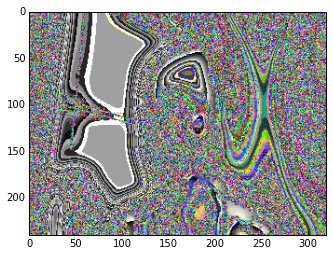

In [215]:
log_reflectance = np.log1p(X) - log_luminance
y = np.exp(log_reflectance*1 + 0.4*log_luminance)
# y = np.power(luminance, 1) * np.power(reflectance,2)
y = np.nan_to_num(y)
y = y.astype(float)/ y.max()*255.
plt.imshow(y)

# reflectance = X / luminance
# y = np.power(luminance, 0.3) * np.power(reflectance,1)
# y = np.nan_to_num(y)
# y = y.astype(float)/ y.max()*255.
# plt.imshow(y)

Face model found!
Eye model found!
Profile model found!
Nose model found!
(240, 320)
[[107  87 116 116]]


{'faceX': 165,
 'faceY': 145,
 'isFrontFace': 1,
 'isRotatedFace': 0,
 'noseX': -1,
 'noseY': -1,
 'time': 1457391537.246593}

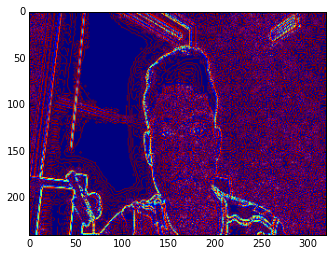

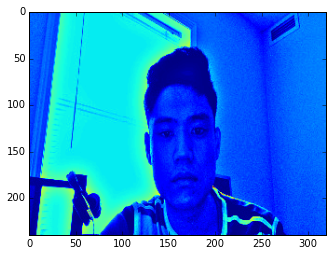

In [216]:
# reread it
# y = np.invert(y)
from scipy import ndimage
cv2.imwrite('test.jpg',y)
y = cv2.imread('test.jpg')
gy = cv2.cvtColor(y, cv2.COLOR_BGR2GRAY)
sob = gy.copy()
ndimage.filters.laplace(gy, sob)

# can optionally try smoothing
# gy = gy*2  + (gy - scipy.ndimage.filters.gaussian_filter(gy, 0.01))
# gy = gy + sob*0.5



# y = np.invert(y)

cv2.imwrite('test-gray.jpg', gy)
gy = cv2.imread('test-gray.jpg')
gy = cv2.cvtColor(gy, cv2.COLOR_BGR2GRAY)
plt.imshow(sob)
plt.figure()
plt.imshow(gy)
viola.apply_viola(y,gy)

In [217]:
gy.shape

(240, 320)

Face model found!
Eye model found!
Profile model found!
Nose model found!
(240, 320)
()


{'faceX': -1,
 'faceY': -1,
 'isFrontFace': 0,
 'isRotatedFace': 0,
 'noseX': -1,
 'noseY': -1,
 'time': 1457391538.291711}

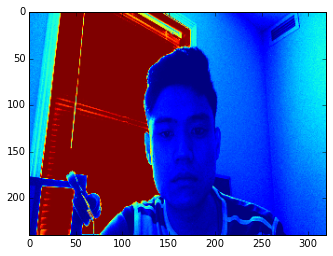

In [218]:
x_gray = cv2.cvtColor(X, cv2.COLOR_BGR2GRAY)
plt.imshow(x_gray)
viola.apply_viola(X, x_gray)